In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import sys
import os
from scipy.optimize import curve_fit
font = {'family' : 'normal',
        'size'   : 25}

plt.rc('font', **font)

In [2]:
def M(U):
    q = (0.9/10000) 
    np = 17
    ns = 17
    mu0 = 1.25663706212e-6
    #todo: den wert iwie halbieren
    return U/(47 *4* 1/(20e-3) * ns * mu0 * q)
def H(Im,Um,U):
    np = 17
    r = 1.5e-2
    u = 2*r*3.14
    L = u
    return np/L * Im/Um * U

def map(v):
    if v == 0.1:
        return 0
    else:
        return 1

In [3]:
def fit_func(x,a,b,c,d):
    return a*np.exp(-b/x + c)+d

def fit_func_pol(x,a,b,c,d,e):
    return a*x**4+b*x**3+c*x**2+d*x+e

def d_fit_func(x,a,b,c,d):
    return (a*b*np.exp((c-b)/x))/x**2

def d_fit_func_pol(x,a,b,c,d):
    return 4*a*x**3+3*b*x**2+2*c*x+d

[ 3.86760678e+00 -1.89013735e+02  2.91641532e+03 -5.44173622e+03
  1.05791484e+04]
[1.68080920e+02 1.37511740e+01 7.52100722e+00 1.14641427e+04]


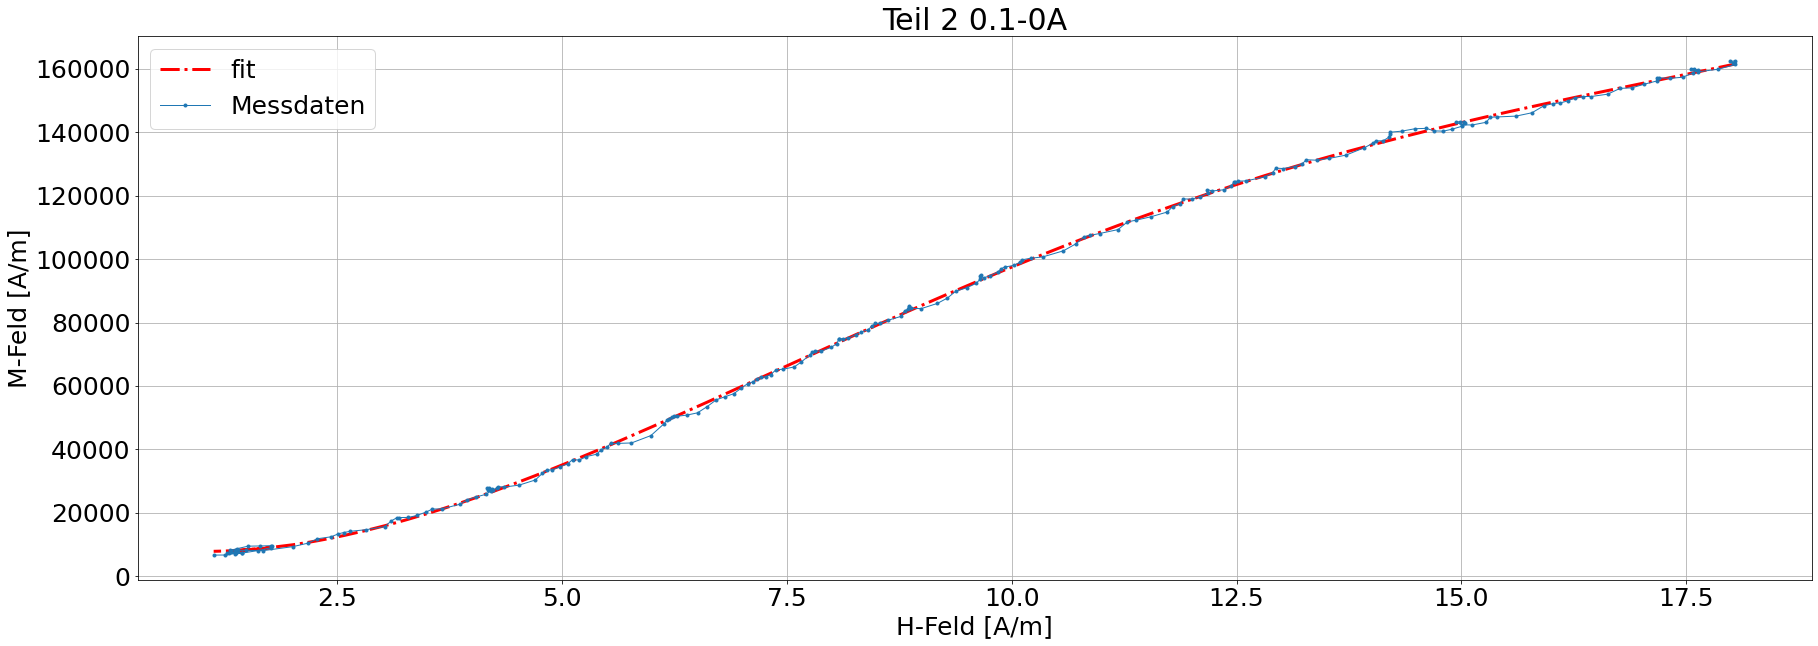

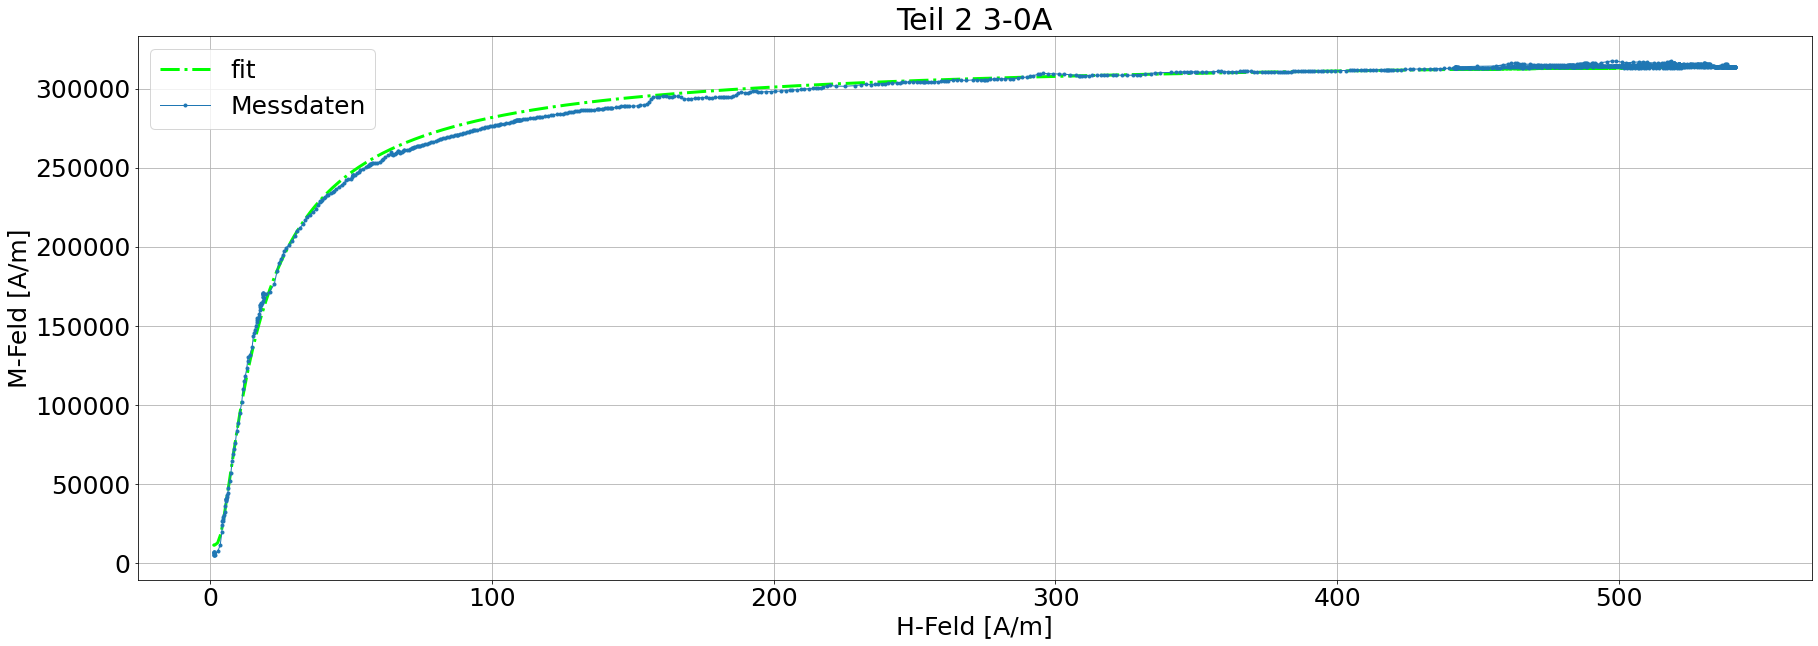

In [48]:
dx = [[],[]]
dy = [[],[]]
dx_n = [[],[]]
dy_n = [[],[]]
mittel_y = [[],[]]
mittel_x = [[],[]]



for name in os.listdir("Daten"):
    if "1" in name:
        Im = 0.1
        color = "red"
    else:
        Im = 3
        color = "lime"
    
    plt.figure(figsize=(30,10))
    file = open("Daten/"+name)
    lines = file.readlines()
    xv,yv = [],[]
    #plt.xlim(-0.25,0.25)
    for line in lines:
        vals = line[:-1].split("\t")
        if Im == 0.1:
            if float(vals[0]) > 3.40656400E-1:
                continue
            xv.append(float(vals[0]))
            yv.append(M(float(vals[1])))
        else:
            xv.append(float(vals[0]))
            yv.append(M(float(vals[1])))
    xv = np.array(xv)
    Um = max(xv)
    xv = H(Im,Um,xv)
    xv = list(xv)
        
    
    if Im == 0.1:
        popt,_ = curve_fit(fit_func_pol,xv,yv)
        plt.plot(xv,[fit_func_pol(x,*popt) for x in xv],color=color,label="fit",linewidth=3,linestyle="-.")
        dx[map(Im)] = [x for x in xv if x>0]
        dy[map(Im)] = [d_fit_func_pol(x,*popt[:-1]) for x in xv if x > 0]
        i = 0
        #numerisches Differenzieren
        dy_n[0] = np.diff(yv)/np.diff(xv)
        for i in range(len(xv)-1):dx_n[0].append(xv[i])
        #for _ in range(int(len(xv)/4)):
        #    mittel_x[0].append(sum(xv[i:i+4]))
        #    mittel_y[0].append(sum(yv[i:i+4]))
        #    i += 4
        #for i in range(1,len(mittel_x[0])):
        #    dx_n[0].append(mittel_x[0][i])
        #    dy_n[0].append((mittel_y[0][i]-mittel_y[0][i-1])/(mittel_x[0][i]-mittel_x[0][i-1]))
    else:
        popt,_ = curve_fit(fit_func,xv,yv)
        plt.plot(xv,[fit_func(x,*popt) for x in xv],color=color,label="fit",linewidth=3,linestyle="-.")
        i = 0
        #numerisches Differenzieren
        dy_n[1] = np.diff(yv)/np.diff(xv)
        for i in range(len(xv)-1):dx_n[1].append(xv[i])

        dx[map(Im)] = [x for x in xv if x>0]
        dy[map(Im)] = [300*d_fit_func(x,*popt) for x in xv if x > 0]
    print(popt)
    plt.plot(xv,yv,marker=".",linewidth=1,label="Messdaten")
    plt.title(name.replace("1","0.1"))
    plt.xlabel("H-Feld [A/m]")
    plt.ylabel("M-Feld [A/m]")
    plt.grid(True)
    plt.legend()
    file.close()
    plt.savefig("..\..\Images\Teil2%s.png"%(name))
    plt.savefig("..\..\Images\Teil2%s.png"%(name))

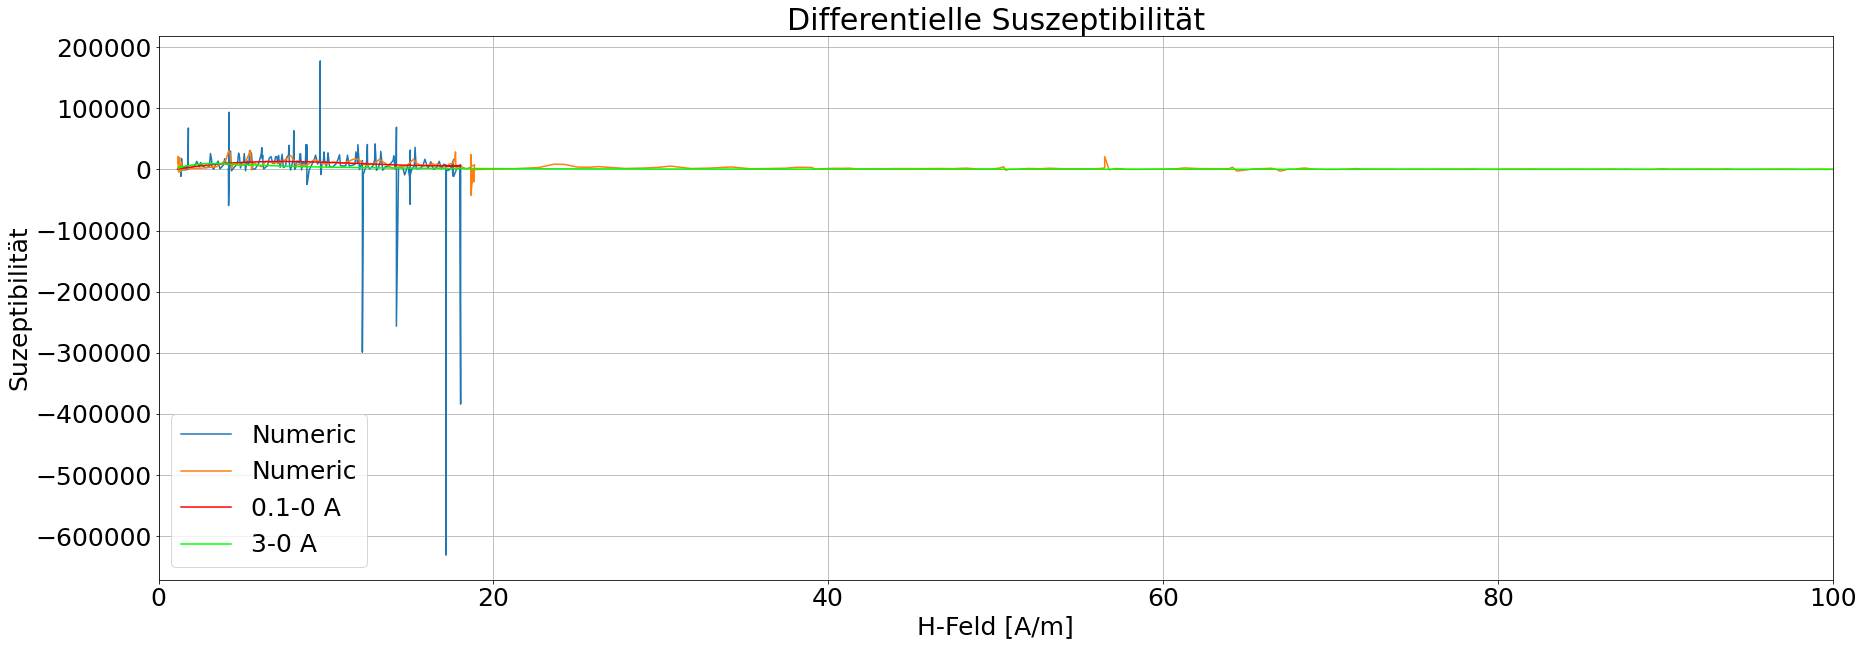

In [49]:



plt.figure(figsize=(30,10))
plt.plot(dx_n[0],dy_n[0],label="Numeric")
plt.plot(dx_n[1],dy_n[1],label="Numeric")
plt.plot(dx[0],dy[0],label="0.1-0 A",color="red")
plt.plot(dx[1],dy[1],label="3-0 A",color="lime")
plt.xlim(0,100)
plt.title("Differentielle Suszeptibilität")
plt.xlabel("H-Feld [A/m]")
plt.ylabel("Suz#62eptibilität")
plt.grid(True)1
plt.legend()
file.close()
plt.savefig("..\..\Images\Teil2%s.png"%("Differentielle Suszeptibilität"))